In [128]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
from numpy import genfromtxt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import math

In [129]:
systoleFile = 'Systole BP Updated.xlsx'
writerSys = pd.ExcelWriter(systoleFile, engine = 'openpyxl')
diastoleFile = 'Diastole BP Updated.xlsx'
writerDia = pd.ExcelWriter(diastoleFile, engine = 'openpyxl')

In [130]:
systolicBP = pd.read_csv('Systolic BP.csv')
diastolicBP = pd.read_csv('Diastolic BP.csv')

In [131]:
systole = pd.DataFrame(systolicBP)
diastole = pd.DataFrame(diastolicBP)

In [132]:
bpData = pd.read_excel('Test- BP Data Set.xlsx')
data = pd.DataFrame(bpData)
data['Zung Score'] = data['Zung Score'].astype(int)
data['Systolic BP'] = data['Systolic BP'].astype(int)
data['Diastolic BP'] = data['Diastolic BP'].astype(int)
data

,Timestamp,Name,Systolic BP,Diastolic BP,Zung Score
0,2022-04-11 17:47:57,Andrew,121,73,28
1,2022-04-12 12:43:28,Andrew,123,75,22
2,2022-04-12 13:54:32,Andrew,109,72,24
3,2022-04-13 09:25:09,Andrew,120,70,20
4,2022-04-13 21:27:08,Andrew,135,75,22
5,2022-04-14 08:45:32,Andrew,116,70,24
6,2022-04-11 16:46:58,Jacob,121,79,25
7,2022-04-11 22:51:18,Jacob,119,81,27
8,2022-04-12 12:43:23,Jacob,118,77,25
9,2022-04-12 20:19:36,Jacob,124,68,25


In [133]:
systole = data[['Zung Score', 'Systolic BP']]
diastole = data[['Zung Score', 'Diastolic BP']]

In [134]:
systole.head(10)

,Zung Score,Systolic BP
0,28,121
1,22,123
2,24,109
3,20,120
4,22,135
5,24,116
6,25,121
7,27,119
8,25,118
9,25,124


In [135]:
diastole.head(10)

,Zung Score,Diastolic BP
0,28,73
1,22,75
2,24,72
3,20,70
4,22,75
5,24,70
6,25,79
7,27,81
8,25,77
9,25,68


In [136]:
scoresSystole = systole["Zung Score"]
scoresDiastole = diastole["Zung Score"]

In [137]:
bpSystole = systole["Systolic BP"]
bpDiastole = diastole["Diastolic BP"]

In [138]:
def plotGraph(x, y, bpType):
    plt.scatter(x, y, c='b', marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType + ' BP', fontsize=20)
    plt.show()

In [139]:
def plotOutlier(data, x, y, bpType, myEps):
    bp_data = data.iloc[:, 0:2].values
    model = DBSCAN(eps=myEps, min_samples=3).fit(bp_data)
    colors = model.labels_
    plt.scatter(x, y, c=colors, marker='o')
    plt.xlabel('Zung Score', fontsize=16)
    plt.ylabel(bpType + ' BP', fontsize=16)
    plt.title('Zung Score vs ' + bpType +' BP', fontsize=20)
    plt.show()

In [140]:
def linRegVals(data):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    n = np.size(X)
    x_mean,y_mean

    Sxy = np.sum(X*Y)- n*x_mean*y_mean
    Sxx = np.sum(X*X)-n*x_mean*x_mean

    b1 = Sxy/Sxx
    b0 = y_mean-b1*x_mean
    print('The slope is', b1)
    print('The y intercept is', b0)

In [141]:
def linearRegression(data):
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    r2 = linear_regressor.score(X, Y)
    r = math.sqrt(r2)
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    linRegVals(data)
    print("R value is " + str(r))

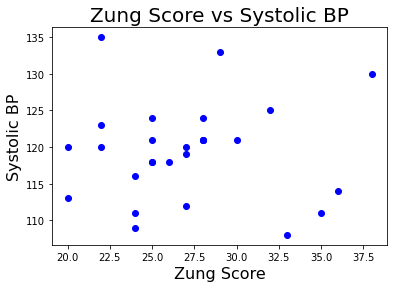

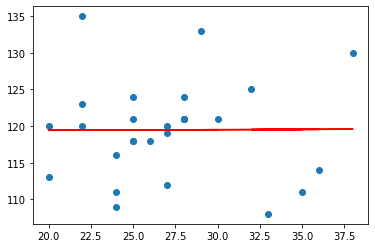

The slope is 0.008054931995258752
The y intercept is 119.26369998679486
R value is 0.005594838148499224


In [142]:
plotGraph(scoresSystole, bpSystole, 'Systolic')
linearRegression(systole)

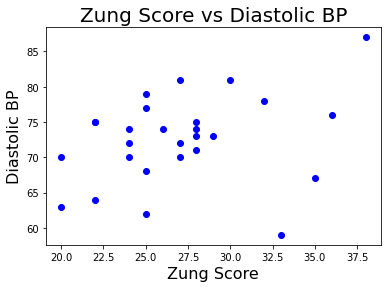

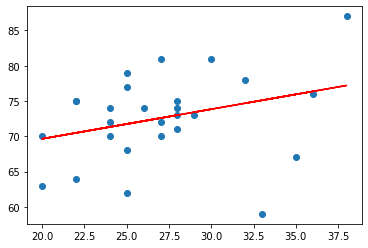

The slope is 0.41964875214578307
The y intercept is 61.24653373828068
R value is 0.31235721552638435


In [143]:
plotGraph(scoresDiastole, bpDiastole, 'Diastolic')
linearRegression(diastole)

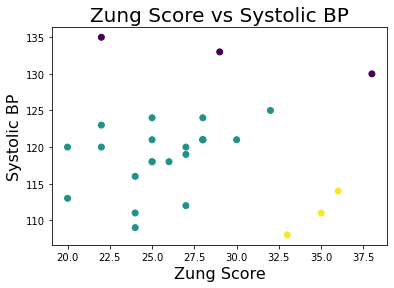

In [144]:
plotOutlier(systole, scoresSystole, bpSystole, 'Systolic', 6)

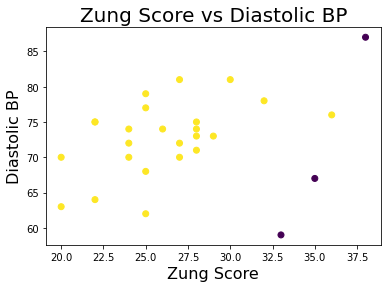

In [145]:
plotOutlier(diastole, scoresDiastole, bpDiastole, 'Diastolic', 5)

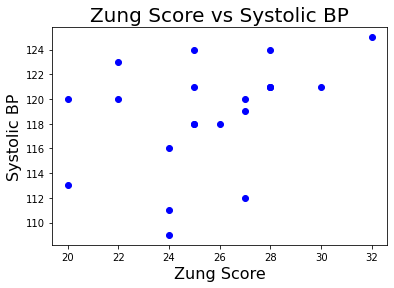

In [146]:
systoleParsed = systole.loc[(systole['Systolic BP'] < 127) & (systole['Zung Score'] < 32.5)]
#systoleParsed = (systole[systoleParsed])
plotGraph(systoleParsed["Zung Score"], systoleParsed['Systolic BP'], 'Systolic')

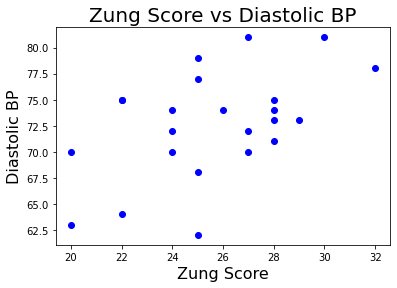

In [150]:
diastoleParsed = diastole['Zung Score'] < 32.5
diastoleParsed = (diastole[diastoleParsed])
plotGraph(diastoleParsed["Zung Score"], diastoleParsed['Diastolic BP'], 'Diastolic')

Systole with Regression


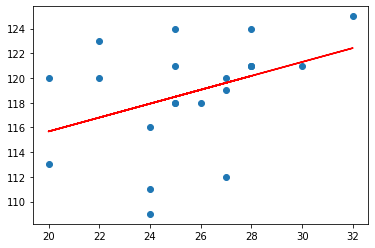

The slope is 0.5625954198473457
The y intercept is 104.42315521628454
R value is 0.39211928908243227


In [151]:
print("Systole with Regression")
linearRegression(systoleParsed)

Diastole with Regression


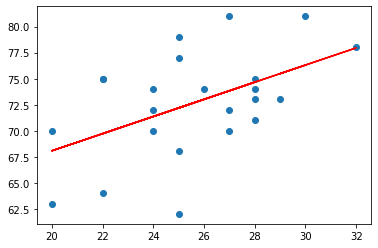

The slope is 0.8245686113393452
The y intercept is 51.571898110107185
R value is 0.4993079276278921


In [152]:
print("Diastole with Regression")
linearRegression(diastoleParsed)

In [153]:
diastoleParsed.to_excel(writerDia, index = False)
writerDia.save()

In [154]:
systoleParsed.to_excel(writerSys, index = False)
writerSys.save()